In [2]:
import requests
import json
import os
url = "https://api.sejm.gov.pl/sejm/term10/votings/{voting}"

In [3]:
from pydantic import BaseModel
from datetime import datetime
from rich import print
from typing import List, Optional
from pydantic import BaseModel, HttpUrl


class VotingOption(BaseModel):
    optionIndex: Optional[int] = None
    option: Optional[str] = None
    description: Optional[str] = None
    votes: Optional[int] = None


class Voting(BaseModel):
    term: Optional[int] = None
    sitting: Optional[int] = None
    sittingDay: Optional[int] = None
    votingNumber: Optional[int] = None
    yes: Optional[int] = None
    no: Optional[int] = None
    abstain: Optional[int] = None
    notParticipating: Optional[int] = None
    totalVoted: Optional[int] = None
    date: Optional[datetime] = None
    title: Optional[str] = None
    description: Optional[str] = None
    topic: Optional[str] = None
    pdfLink: Optional[str] = None
    kind: Optional[str] = None
    votingOptions: Optional[List[VotingOption]] = None

In [4]:
URL = url.format(voting=1)
resp = requests.get(URL)
resp.raise_for_status()
data = resp.json()
all_votings = []
for voting_data in data:
    voting = Voting(**voting_data)
    all_votings.append(voting)
print(f'all votings: {len(all_votings)}')

all votings: 100

In [5]:
print(f'voting 1: {all_votings[-2]}')

voting 1: term=10 sitting=1 sittingDay=8 votingNumber=99 yes=432 no=0 abstain=3 notParticipating=25 totalVoted=435 
date=datetime.datetime(2023, 12, 7, 19, 15, 44) title='Pkt. 39 Wybór uzupełniający do składu osobowego Komisji do 
Spraw Unii Europejskiej (druk nr 91)' description='wniosek z druku nr 91' topic='głosowanie nad przyjęciem wniosku 
z druku.' pdfLink=None kind='ELECTRONIC' votingOptions=None

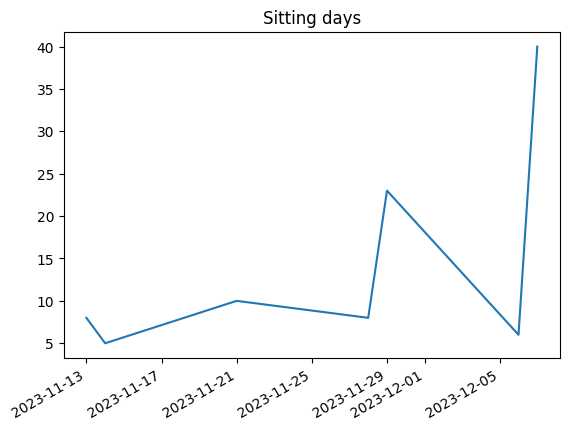

In [6]:
# plot sitting days
from collections import defaultdict
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

sitting_days = defaultdict(int)
for voting in all_votings:
    sitting_days[voting.date.date()] += 1
sitting_days = sorted(sitting_days.items(), key=lambda x: x[0])
dates, counts = zip(*sitting_days)
dates = np.array(dates)
counts = np.array(counts)
fig, ax = plt.subplots()
ax.plot(dates, counts)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Sitting days')
fig.autofmt_xdate()


In [7]:
from typing import Dict, List, Optional
from pydantic import BaseModel, HttpUrl

class ListVotes(BaseModel):
    additionalProp1: Optional[str] = None
    additionalProp2: Optional[str] = None
    additionalProp3: Optional[str] = None

class Votes(BaseModel):
    MP: Optional[int] = None
    firstName: Optional[str] = None
    lastName: Optional[str] = None
    club: Optional[str] = None
    vote: Optional[str] = None
    listVotes: Optional[ListVotes] = None
    mP: Optional[int] = None

class VotingOption(BaseModel):
    optionIndex: Optional[int] = None
    option: Optional[str] = None
    description: Optional[str] = None
    votes: Optional[int] = None

class VotesDetail(BaseModel):
    yes: Optional[int] = None
    no: Optional[int] = None
    abstain: Optional[int] = None
    notParticipating: Optional[int] = None
    term: Optional[int] = None
    sitting: Optional[int] = None
    sittingDay: Optional[int] = None
    votingNumber: Optional[int] = None
    date: Optional[str] = None
    title: Optional[str] = None
    description: Optional[str] = None
    topic: Optional[str] = None
    pdfLink: Optional[HttpUrl] = None
    kind: Optional[str] = None
    votingOptions: Optional[List[VotingOption]] = None
    totalVoted: Optional[int] = None
    votes: Optional[List[Votes]] = None

In [16]:
voting_json = 'https://api.sejm.gov.pl/sejm/term10/votings/1/101'
resp = requests.get(voting_json)
resp.raise_for_status()
voting_json = resp.json()
voting_detail = VotesDetail(**voting_json)

HTTPError: 404 Client Error: Not Found for url: https://api.sejm.gov.pl/sejm/term10/votings/1/101

In [13]:
voting_detail.votes[3]

Votes(MP=4, firstName='Waldemar', lastName='Andzel', club='PiS', vote='YES', listVotes=None, mP=None)

In [10]:
import pandas as pd
# votes:List[Votes] = voting_detail.votes
votes = voting_json['votes']
df = pd.DataFrame(votes)

<Axes: ylabel='club'>

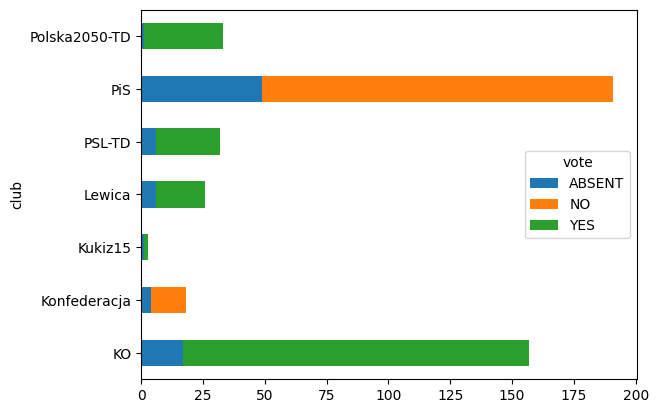

In [11]:
# plot votes by club

df.groupby('club').vote.value_counts().unstack().plot.barh(stacked=True)
